# Capstone Project: Best Maryland Public Schools  #
## Author: Yan Zhu ##

<a id='load_data'></a>

# 0. What are you working on
** Your project title:** 
_Determine MD school district with best school ratings, has all 3 school levels, and highest number of Asian population. Then, predict school rating based on school demographics._

** What are the outcome of your project: Clarksville and Ellicott City have all 3 school levels located within its vincinity with above school ratings of 9, with over 20% Asian population, and below 16 pupil to teacher ratio.**   

** Data Source:(provide a link to dataset if available)** _https://nces.ed.gov/; https://www.greatschools.org/_

**Load packages:**

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

#more packages import as needed

<a id='load_data'></a>

# 1. Load the data

---

Import school.csv downloaded from nces.ed.gov into a pandas DataFrame (school). Import rating.csv gathered from greatschools.org into a pandas DataFrame (rating).

In [2]:
#put you csv file in the same folder as this jupyter notebook file
#read in your data into a dataframe like df = pd.read_csv("yourfile.csv")
school = pd.read_csv("school.csv")
rating = pd.read_csv("rating.csv")

In [3]:
school.head(2)

,School Name,State Name [Public School] Latest available year,State Abbr [Public School] Latest available year,School Name [Public School] 2015-16,County Name [Public School] 2015-16,Location City [Public School] 2015-16,Location State Abbr [Public School] 2015-16,School Type [Public School] 2015-16,Charter School [Public School] 2015-16,Magnet School [Public School] 2015-16,...,Total Students All Grades (Includes AE) [Public School] 2015-16,Asian or Asian/Pacific Islander Students [Public School] 2015-16,Black Students [Public School] 2015-16,White Students [Public School] 2015-16,Total Race/Ethnicity [Public School] 2015-16,Male Students [Public School] 2015-16,Female Students [Public School] 2015-16,State Name [Public School] 2015-16,Full-Time Equivalent (FTE) Teachers [Public School] 2015-16,Pupil/Teacher Ratio [Public School] 2015-16
0,A. MARIO LOIEDERMAN MIDDLE,Maryland,MD,A. Mario Loiederman Middle,Montgomery County,SILVER SPRING,MD,1-Regular school,2-No,1-Yes,...,919,56,198,107,919,367,552,MARYLAND,62.6,14.68
1,ABBOTTSTON ELEMENTARY,Maryland,MD,Abbottston Elementary,Baltimore city,BALTIMORE,MD,1-Regular school,2-No,2-No,...,217,1,205,5,217,106,111,MARYLAND,11,19.73


In [4]:
school.columns

Index(['School Name', 'State Name [Public School] Latest available year',
       'State Abbr [Public School] Latest available year',
       'School Name [Public School] 2015-16',
       'County Name [Public School] 2015-16',
       'Location City [Public School] 2015-16',
       'Location State Abbr [Public School] 2015-16',
       'School Type [Public School] 2015-16',
       'Charter School [Public School] 2015-16',
       'Magnet School [Public School] 2015-16',
       'School Level Code [Public School] 2015-16',
       'Total Students All Grades (Excludes AE) [Public School] 2015-16',
       'Total Students All Grades (Includes AE) [Public School] 2015-16',
       'Asian or Asian/Pacific Islander Students [Public School] 2015-16',
       'Black Students [Public School] 2015-16',
       'White Students [Public School] 2015-16',
       'Total Race/Ethnicity [Public School] 2015-16',
       'Male Students [Public School] 2015-16',
       'Female Students [Public School] 2015-16',
    

In [5]:
rating.head(2)

,School Name [Public School] 2015-16,GreatSchools Rating,County Name [Public School] 2015-16,Location City [Public School] 2015-16,Location State Abbr [Public School] 2015-16
0,A. Mario Loiederman Middle,4,Montgomery County,SILVER SPRING,MD
1,Abbottston Elementary,2,Baltimore city,BALTIMORE,MD


Map rating DataFrame into school using School Name as ID.

In [6]:
df=pd.merge(school, rating[['School Name [Public School] 2015-16', 'GreatSchools Rating' ]], on='School Name [Public School] 2015-16')

<a id='load_data'></a>

# 2. Parse the data

** Describe the basic format of the data and the columns **
---

Use the `.head()` function (and optionally pass in an integer for the number of rows you want to see) to examine what the loaded data looks like. This is a good initial step to get a feel for what is in the csv and what problems may be present.

The `.dtypes` attribute tells you the data type for each of your columns.

In [7]:
df.head()

,School Name,State Name [Public School] Latest available year,State Abbr [Public School] Latest available year,School Name [Public School] 2015-16,County Name [Public School] 2015-16,Location City [Public School] 2015-16,Location State Abbr [Public School] 2015-16,School Type [Public School] 2015-16,Charter School [Public School] 2015-16,Magnet School [Public School] 2015-16,...,Asian or Asian/Pacific Islander Students [Public School] 2015-16,Black Students [Public School] 2015-16,White Students [Public School] 2015-16,Total Race/Ethnicity [Public School] 2015-16,Male Students [Public School] 2015-16,Female Students [Public School] 2015-16,State Name [Public School] 2015-16,Full-Time Equivalent (FTE) Teachers [Public School] 2015-16,Pupil/Teacher Ratio [Public School] 2015-16,GreatSchools Rating
0,A. MARIO LOIEDERMAN MIDDLE,Maryland,MD,A. Mario Loiederman Middle,Montgomery County,SILVER SPRING,MD,1-Regular school,2-No,1-Yes,...,56,198,107,919,367,552,MARYLAND,62.6,14.68,4
1,ABBOTTSTON ELEMENTARY,Maryland,MD,Abbottston Elementary,Baltimore city,BALTIMORE,MD,1-Regular school,2-No,2-No,...,1,205,5,217,106,111,MARYLAND,11,19.73,2
2,ABERDEEN HIGH,Maryland,MD,Aberdeen High,Harford County,ABERDEEN,MD,1-Regular school,2-No,1-Yes,...,63,515,593,1453,790,663,MARYLAND,95.33,15.24,6
3,ABERDEEN MIDDLE,Maryland,MD,Aberdeen Middle,Harford County,ABERDEEN,MD,1-Regular school,2-No,2-No,...,41,443,473,1184,562,622,MARYLAND,80.34,14.74,5
4,ABINGDON ELEMENTARY,Maryland,MD,Abingdon Elementary,Harford County,ABINGDON,MD,1-Regular school,2-No,2-No,...,24,129,549,809,410,399,MARYLAND,51.59,15.68,8


In [8]:
df.dtypes

School Name                                                         object
State Name [Public School] Latest available year                    object
State Abbr [Public School] Latest available year                    object
School Name [Public School] 2015-16                                 object
County Name [Public School] 2015-16                                 object
Location City [Public School] 2015-16                               object
Location State Abbr [Public School] 2015-16                         object
School Type [Public School] 2015-16                                 object
Charter School [Public School] 2015-16                              object
Magnet School [Public School] 2015-16                               object
School Level Code [Public School] 2015-16                           object
Total Students All Grades (Excludes AE) [Public School] 2015-16     object
Total Students All Grades (Includes AE) [Public School] 2015-16     object
Asian or Asian/Pacific Is

---

Use the `.info()` function  to see how many rows and data types you got. This will also tell you how many rows of each column have content

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 0 to 1512
Data columns (total 23 columns):
School Name                                                         1513 non-null object
State Name [Public School] Latest available year                    1513 non-null object
State Abbr [Public School] Latest available year                    1513 non-null object
School Name [Public School] 2015-16                                 1513 non-null object
County Name [Public School] 2015-16                                 1513 non-null object
Location City [Public School] 2015-16                               1513 non-null object
Location State Abbr [Public School] 2015-16                         1513 non-null object
School Type [Public School] 2015-16                                 1513 non-null object
Charter School [Public School] 2015-16                              1513 non-null object
Magnet School [Public School] 2015-16                               1513 non-null object
Sch

<a id='load_data'></a>

# 3. Refine the Data

** Drop unwanted columns **
---
You may want to focus on selected columns as your input features. You can drop those unwanted columns.

The `.drop()` built-in function can be used to get rid of a column. When removing a column, we need to specify `axis=1` to the function.

For the record, the `.index` attribute holds the row indices. This is the the sister attribute to the `.columns` attribute that we work with more often.

School names, State Names, State Abbr, Location Abbr are duplicated information so those columns are removed. 

In [10]:
df.columns

Index(['School Name', 'State Name [Public School] Latest available year',
       'State Abbr [Public School] Latest available year',
       'School Name [Public School] 2015-16',
       'County Name [Public School] 2015-16',
       'Location City [Public School] 2015-16',
       'Location State Abbr [Public School] 2015-16',
       'School Type [Public School] 2015-16',
       'Charter School [Public School] 2015-16',
       'Magnet School [Public School] 2015-16',
       'School Level Code [Public School] 2015-16',
       'Total Students All Grades (Excludes AE) [Public School] 2015-16',
       'Total Students All Grades (Includes AE) [Public School] 2015-16',
       'Asian or Asian/Pacific Islander Students [Public School] 2015-16',
       'Black Students [Public School] 2015-16',
       'White Students [Public School] 2015-16',
       'Total Race/Ethnicity [Public School] 2015-16',
       'Male Students [Public School] 2015-16',
       'Female Students [Public School] 2015-16',
    

In [11]:
a=pd.DataFrame(df.columns)
a.columns =['Column Names']
a

,Column Names
0,School Name
1,State Name [Public School] Latest available year
2,State Abbr [Public School] Latest available year
3,School Name [Public School] 2015-16
4,County Name [Public School] 2015-16
5,Location City [Public School] 2015-16
6,Location State Abbr [Public School] 2015-16
7,School Type [Public School] 2015-16
8,Charter School [Public School] 2015-16
9,Magnet School [Public School] 2015-16


In [12]:
# Remove the unneccesary column:
df=df.drop(df.columns[[0,1,2,6,11,12,19]], axis=1)
df.head()

,School Name [Public School] 2015-16,County Name [Public School] 2015-16,Location City [Public School] 2015-16,School Type [Public School] 2015-16,Charter School [Public School] 2015-16,Magnet School [Public School] 2015-16,School Level Code [Public School] 2015-16,Asian or Asian/Pacific Islander Students [Public School] 2015-16,Black Students [Public School] 2015-16,White Students [Public School] 2015-16,Total Race/Ethnicity [Public School] 2015-16,Male Students [Public School] 2015-16,Female Students [Public School] 2015-16,Full-Time Equivalent (FTE) Teachers [Public School] 2015-16,Pupil/Teacher Ratio [Public School] 2015-16,GreatSchools Rating
0,A. Mario Loiederman Middle,Montgomery County,SILVER SPRING,1-Regular school,2-No,1-Yes,2-Middle,56,198,107,919,367,552,62.6,14.68,4
1,Abbottston Elementary,Baltimore city,BALTIMORE,1-Regular school,2-No,2-No,1-Primary,1,205,5,217,106,111,11,19.73,2
2,Aberdeen High,Harford County,ABERDEEN,1-Regular school,2-No,1-Yes,3-High,63,515,593,1453,790,663,95.33,15.24,6
3,Aberdeen Middle,Harford County,ABERDEEN,1-Regular school,2-No,2-No,2-Middle,41,443,473,1184,562,622,80.34,14.74,5
4,Abingdon Elementary,Harford County,ABINGDON,1-Regular school,2-No,2-No,1-Primary,24,129,549,809,410,399,51.59,15.68,8


In [13]:
df.shape

(1513, 16)

**  Rename columns **
---
It is useful to have long columns names but it makes it difficult to see the entire dataset on one screen. Using the `.rename()` function I shorten the columns names to something meaningful but easy to call out.

There two popular methods to rename dataframe columns.
1. Using a _dictionary substitution_, which is very useful if you only want to rename a few of the columns. This method uses the `.rename()` function.
2. Using a _list replacement_, which is quicker than writing out a dictionary, but requires a full list of names.

In [14]:
# Dictionary Method
new_column={'School Name [Public School] 2015-16':'School_Name', 
            'County Name [Public School] 2015-16': 'County_Name', 
            'Location City [Public School] 2015-16':'Location',
            'School Type [Public School] 2015-16': 'School_Type', 
            'Charter School [Public School] 2015-16': 'Charter_School', 
            'Magnet School [Public School] 2015-16': 'Magnet_School', 
            'School Level Code [Public School] 2015-16': 'School_Level_Code', 
            'Asian or Asian/Pacific Islander Students [Public School] 2015-16': 'num_Asian', 
            'Black Students [Public School] 2015-16':'num_Black', 
            'White Students [Public School] 2015-16':'num_White', 
            'Total Race/Ethnicity [Public School] 2015-16': 'TotalStudents', 
            'Male Students [Public School] 2015-16':'num_Male', 
            'Female Students [Public School] 2015-16':'num_Female', 
            'State Name [Public School] 2015-16':'State_Name', 
            'Full-Time Equivalent (FTE) Teachers [Public School] 2015-16':'FTE_Teachers', 
            'Pupil/Teacher Ratio [Public School] 2015-16':'Pupil_Teacher_Ratio',
            'GreatSchools Rating':'Rating'
}
df.rename(columns=new_column, inplace =True)
df.head(2)

,School_Name,County_Name,Location,School_Type,Charter_School,Magnet_School,School_Level_Code,num_Asian,num_Black,num_White,TotalStudents,num_Male,num_Female,FTE_Teachers,Pupil_Teacher_Ratio,Rating
0,A. Mario Loiederman Middle,Montgomery County,SILVER SPRING,1-Regular school,2-No,1-Yes,2-Middle,56,198,107,919,367,552,62.6,14.68,4
1,Abbottston Elementary,Baltimore city,BALTIMORE,1-Regular school,2-No,2-No,1-Primary,1,205,5,217,106,111,11,19.73,2


** Clean corrupted columns (if there is any) **
---

Did you notice when you examined the `dtypes` attribute that some of the columns were of type "object", indicating that they were string. For some case, these columns should be numeric instead.

It is pretty common to have numeric columns represented as strings in your data if some of the observations are corrupted. It is important to always check the data types of your columns.

When we start to build models with data, null values in observations are (almost) never allowed. It is important to always see how many observations are missing and for which columns.

A handy way to look at how many null values there are per column with pandas is:

```python
boston.isnull().sum()
```

The `.isull()` built-in function will convert the columns to boolean `True` and `False` values (returning a new dataframe) where null values are indicated by `True`. 

The `.sum()` function tacked on to the back of that will then sum these boolean columns, and the total number of null values per column will be returned.

Remove missing data throughout the dataset. Replace '†','–','‡','NR' with NaN. 

In [15]:
df=df.replace(['†','–','‡'],np.nan)
df=df.replace(['NR'],np.nan)
df

,School_Name,County_Name,Location,School_Type,Charter_School,Magnet_School,School_Level_Code,num_Asian,num_Black,num_White,TotalStudents,num_Male,num_Female,FTE_Teachers,Pupil_Teacher_Ratio,Rating
0,A. Mario Loiederman Middle,Montgomery County,SILVER SPRING,1-Regular school,2-No,1-Yes,2-Middle,56,198,107,919,367,552,62.6,14.68,4
1,Abbottston Elementary,Baltimore city,BALTIMORE,1-Regular school,2-No,2-No,1-Primary,1,205,5,217,106,111,11,19.73,2
2,Aberdeen High,Harford County,ABERDEEN,1-Regular school,2-No,1-Yes,3-High,63,515,593,1453,790,663,95.33,15.24,6
3,Aberdeen Middle,Harford County,ABERDEEN,1-Regular school,2-No,2-No,2-Middle,41,443,473,1184,562,622,80.34,14.74,5
4,Abingdon Elementary,Harford County,ABINGDON,1-Regular school,2-No,2-No,1-Primary,24,129,549,809,410,399,51.59,15.68,8
5,Academy for College and Career Exploration,Baltimore city,BALTIMORE,1-Regular school,2-No,2-No,4-Other,2,569,27,608,339,269,40,15.2,2
6,Academy of Health Sciences at PGCC,Prince George's County,LARGO,1-Regular school,2-No,1-Yes,3-High,40,286,13,407,139,268,15,27.13,NaN
7,Accident Elementary,Garrett County,ACCIDENT,1-Regular school,2-No,2-No,1-Primary,0,2,237,243,122,121,20,12.15,6
8,Accokeek Academy,Prince George's County,ACCOKEEK,1-Regular school,2-No,1-Yes,1-Primary,63,1125,79,1445,703,742,85.36,16.93,6
9,Achievement Academy @ Harbor City High,Baltimore city,BALTIMORE,4-Alternative/other school,2-No,2-No,3-High,0,335,0,340,204,136,23,14.78,NaN


In [16]:
# How many columns have how null values?
df.isnull().sum()

School_Name              0
County_Name              0
Location                 0
School_Type              0
Charter_School           0
Magnet_School           12
School_Level_Code       40
num_Asian               40
num_Black               40
num_White               40
TotalStudents            0
num_Male                40
num_Female              40
FTE_Teachers            28
Pupil_Teacher_Ratio     56
Rating                 173
dtype: int64

** Drop the null values ** 
---

In this case, lets keep it simple and just drop the rows from the dataset that contain null values. If a column has a ton of null values it often makes more sense to drop the column entirely instead of the rows with null values. In this case, we will just drop the rows.

The `.dropna()` function will drop any rows that have _**ANY**_ null values for you.  Use this carefully as you could drop many more rows than expected.

** Instead of dropping null values, you may want to impute them (replace with the mean(numeric type) or most frequently occured item(object type) **

In [17]:
# Now drop the rows with null values
# df.dropna(inplace=True)
# check the new size after dropping by df.shape
df.dropna(inplace=True)
df.shape

(1335, 16)

<a id='load_data'></a>

** Set Data Type **
---
Ensure # of students are integers and ratios are floats.

In [18]:
int_col = ['num_Asian', 'num_Black',
           'num_White', 'TotalStudents', 'num_Male',
           'num_Female','Rating']
for col in int_col:
    df[col] = [int(float(x)) for x in df[col]]

float_col = ['FTE_Teachers',
             'Pupil_Teacher_Ratio']
for col in float_col:
    df[col] = [float(x) for x in df[col]]
df.dtypes

School_Name             object
County_Name             object
Location                object
School_Type             object
Charter_School          object
Magnet_School           object
School_Level_Code       object
num_Asian                int64
num_Black                int64
num_White                int64
TotalStudents            int64
num_Male                 int64
num_Female               int64
FTE_Teachers           float64
Pupil_Teacher_Ratio    float64
Rating                   int64
dtype: object

** Convert Numbers of Students to Ratio **
---
Much like the Pupil to Teach ratio, number of students in each demographic categories are more meaningful when you compare to respect of total students. We will create new columns of ratio of students to the total numbers of students.

Create a subset with only columns that are of interest. 
'School_Name', 'County_Name', 'Location', 'School_Type','Charter_School', 'Magnet_School', 'School_Level_Code',
          'Pupil_Teacher_Ratio','Black_Ratio', 'White_Ratio', 'Asian_Ratio', 'Male_Ratio', 'Female_Ratio','Rating'

In [19]:
df['Black_Ratio']= df['num_Black'] / df['TotalStudents']
df['White_Ratio'] =df['num_White'] / df['TotalStudents']
df['Asian_Ratio'] =df['num_Asian'] / df['TotalStudents']
df['Male_Ratio'] =df['num_Male'] / df['TotalStudents']
df['Female_Ratio'] =df['num_Female'] / df['TotalStudents']
df

,School_Name,County_Name,Location,School_Type,Charter_School,Magnet_School,School_Level_Code,num_Asian,num_Black,num_White,...,num_Male,num_Female,FTE_Teachers,Pupil_Teacher_Ratio,Rating,Black_Ratio,White_Ratio,Asian_Ratio,Male_Ratio,Female_Ratio
0,A. Mario Loiederman Middle,Montgomery County,SILVER SPRING,1-Regular school,2-No,1-Yes,2-Middle,56,198,107,...,367,552,62.60,14.68,4,0.215452,0.116431,0.060936,0.399347,0.600653
1,Abbottston Elementary,Baltimore city,BALTIMORE,1-Regular school,2-No,2-No,1-Primary,1,205,5,...,106,111,11.00,19.73,2,0.944700,0.023041,0.004608,0.488479,0.511521
2,Aberdeen High,Harford County,ABERDEEN,1-Regular school,2-No,1-Yes,3-High,63,515,593,...,790,663,95.33,15.24,6,0.354439,0.408121,0.043359,0.543703,0.456297
3,Aberdeen Middle,Harford County,ABERDEEN,1-Regular school,2-No,2-No,2-Middle,41,443,473,...,562,622,80.34,14.74,5,0.374155,0.399493,0.034628,0.474662,0.525338
4,Abingdon Elementary,Harford County,ABINGDON,1-Regular school,2-No,2-No,1-Primary,24,129,549,...,410,399,51.59,15.68,8,0.159456,0.678616,0.029666,0.506799,0.493201
5,Academy for College and Career Exploration,Baltimore city,BALTIMORE,1-Regular school,2-No,2-No,4-Other,2,569,27,...,339,269,40.00,15.20,2,0.935855,0.044408,0.003289,0.557566,0.442434
7,Accident Elementary,Garrett County,ACCIDENT,1-Regular school,2-No,2-No,1-Primary,0,2,237,...,122,121,20.00,12.15,6,0.008230,0.975309,0.000000,0.502058,0.497942
8,Accokeek Academy,Prince George's County,ACCOKEEK,1-Regular school,2-No,1-Yes,1-Primary,63,1125,79,...,703,742,85.36,16.93,6,0.778547,0.054671,0.043599,0.486505,0.513495
10,Adelphi Elementary,Prince George's County,ADELPHI,1-Regular school,2-No,2-No,1-Primary,13,153,15,...,382,349,46.20,15.82,4,0.209302,0.020520,0.017784,0.522572,0.477428
12,Afya Public Charter School,Baltimore city,BALTIMORE,1-Regular school,1-Yes,2-No,2-Middle,1,337,4,...,209,139,29.00,12.00,2,0.968391,0.011494,0.002874,0.600575,0.399425


In [20]:
df.columns

Index(['School_Name', 'County_Name', 'Location', 'School_Type',
       'Charter_School', 'Magnet_School', 'School_Level_Code', 'num_Asian',
       'num_Black', 'num_White', 'TotalStudents', 'num_Male', 'num_Female',
       'FTE_Teachers', 'Pupil_Teacher_Ratio', 'Rating', 'Black_Ratio',
       'White_Ratio', 'Asian_Ratio', 'Male_Ratio', 'Female_Ratio'],
      dtype='object')

In [21]:
#slect a subset of data for the next step.
df=df[['School_Name', 'County_Name', 'Location', 'School_Type','Charter_School', 'Magnet_School', 'School_Level_Code',
          'TotalStudents','Pupil_Teacher_Ratio','Black_Ratio', 'White_Ratio', 'Asian_Ratio', 'Male_Ratio', 'Female_Ratio','Rating']]
df.head(2)

,School_Name,County_Name,Location,School_Type,Charter_School,Magnet_School,School_Level_Code,TotalStudents,Pupil_Teacher_Ratio,Black_Ratio,White_Ratio,Asian_Ratio,Male_Ratio,Female_Ratio,Rating
0,A. Mario Loiederman Middle,Montgomery County,SILVER SPRING,1-Regular school,2-No,1-Yes,2-Middle,919,14.68,0.215452,0.116431,0.060936,0.399347,0.600653,4
1,Abbottston Elementary,Baltimore city,BALTIMORE,1-Regular school,2-No,2-No,1-Primary,217,19.73,0.944700,0.023041,0.004608,0.488479,0.511521,2


<a id='describe'></a>

# 6. Describe the summary statistics for the columns

---

The `.describe()` function gives summary statistics for each of your variables. What are some, if any, oddities you notice about the variables based on this output?

In [22]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
School_Name,1335,1243,Martin Luther King Jr. Middle,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County_Name,1335,24,Prince George's County,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,1335,243,BALTIMORE,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
School_Type,1335,4,1-Regular school,1312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charter_School,1335,2,2-No,1291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Magnet_School,1335,2,2-No,1239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
School_Level_Code,1335,4,1-Primary,876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalStudents,1335,NaN,NaN,NaN,657.685,386.05,55,417.5,559,762.5,2882
Pupil_Teacher_Ratio,1335,NaN,NaN,NaN,15.249,2.49395,2.48,13.96,15.39,16.83,43
Black_Ratio,1335,NaN,NaN,NaN,0.365085,0.318188,0,0.0901495,0.255348,0.594848,0.997674


** Remove Duplicates **
---
Through summary statistics, it was determined that there are 60 duplicates within the dataset. Use `groupby().apply()` to sort the data and then use `drop_duplicates()` to drop the duplicates.

In [23]:
df['School_Name'].value_counts()

Martin Luther King Jr. Middle       4
Hillcrest Elementary                4
Rosemont Elementary                 4
William Paca Elementary             4
Northern Middle                     4
Stephen Decatur Middle              4
Seven Oaks Elementary               4
Winfield Elementary                 4
Frederick Douglass High             4
Hickory Elementary                  4
Magnolia Elementary                 4
Edgewood Elementary                 4
Belmont Elementary                  4
White Marsh Elementary              4
Germantown Elementary               4
James McHenry Elementary            4
Hollywood Elementary                4
Monocacy Elementary                 4
Beall Elementary                    4
Southern Middle                     4
Liberty Elementary                  4
Northwestern High                   4
Carroll Manor Elementary            4
Bel Air Elementary                  4
Flintstone Elementary               4
North Bend Elementary               4
Calvert Elem

In [24]:
#display a subset of schools to demonstrate that same school names are used in different counties.
subset1=df[['School_Name', 'County_Name', 'Location', 'School_Type', 'School_Level_Code', 'Rating']]
subset1[subset1['School_Name']=='Waverly Elementary']

,School_Name,County_Name,Location,School_Type,School_Level_Code,Rating
1404,Waverly Elementary,Baltimore city,BALTIMORE,1-Regular school,1-Primary,2
1405,Waverly Elementary,Baltimore city,BALTIMORE,1-Regular school,1-Primary,9
1406,Waverly Elementary,Howard County,ELLICOTT CITY,1-Regular school,1-Primary,2
1407,Waverly Elementary,Howard County,ELLICOTT CITY,1-Regular school,1-Primary,9


In [25]:
#find multiple instances of the same rows of data where school name, county name, location, and school level codes are the same and drop them from the dataset.
grouped=df.groupby(['School_Name', 'County_Name', 'Location', 'School_Level_Code']).apply(lambda x: x.sort_values('Rating')).reset_index(drop=True)
df=grouped.drop_duplicates(subset=['School_Name', 'County_Name', 'Location', 'School_Level_Code'], keep='first')
df.head(2)

,School_Name,County_Name,Location,School_Type,Charter_School,Magnet_School,School_Level_Code,TotalStudents,Pupil_Teacher_Ratio,Black_Ratio,White_Ratio,Asian_Ratio,Male_Ratio,Female_Ratio,Rating
0,A. Mario Loiederman Middle,Montgomery County,SILVER SPRING,1-Regular school,2-No,1-Yes,2-Middle,919,14.68,0.215452,0.116431,0.060936,0.399347,0.600653,4
1,Abbottston Elementary,Baltimore city,BALTIMORE,1-Regular school,2-No,2-No,1-Primary,217,19.73,0.944700,0.023041,0.004608,0.488479,0.511521,2


In [26]:
df.shape

(1275, 15)

# 7. Plot variables with potential outliers using boxplots.

---
You can use the seaborn package to plot boxplots of the variables we have identified as potentially having outliers.

Some notes on seaborn's boxplot keyword argument options:

    orient: can be 'v' or 'h' for vertical and horizontal, respectively
    fliersize: the size of the outlier points (pixels I think)
    linewidth: the width of line outlining the boxplot
    notch: show the confidence interval for the median (calculated by seaborn/plt.boxplot)
    saturation: saturate the colors to an extent

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

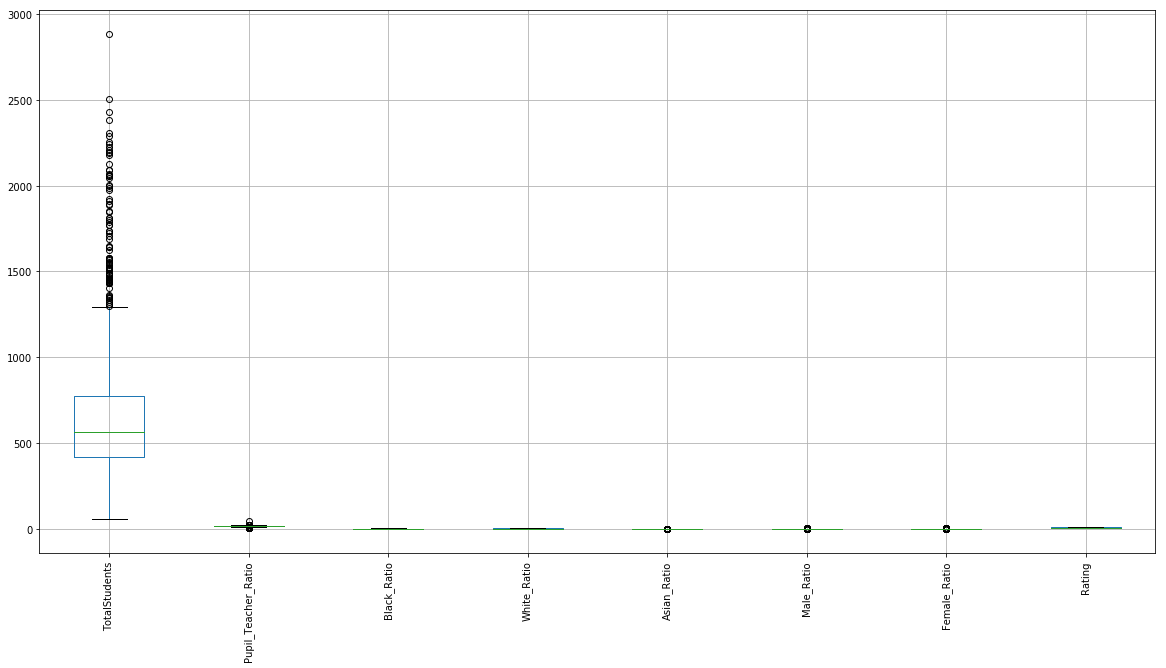

In [27]:
fig, axes = plt.subplots(figsize = (20, 10))

df.boxplot(ax = axes)

plt.title('')

plt.xticks(rotation = 90)

**Scale the Graph**
---
Above graph is hard to see since each data set has a different range.  From the looks of it, we will group the following into 2 different boxplot graphs. 
1-'Pupil_Teacher_Ratio', 'Rating'
2- 'Asian_Ratio', 'Black_Ratio',  'White_Ratio', 'Male_Ratio', 'Female_Ratio'

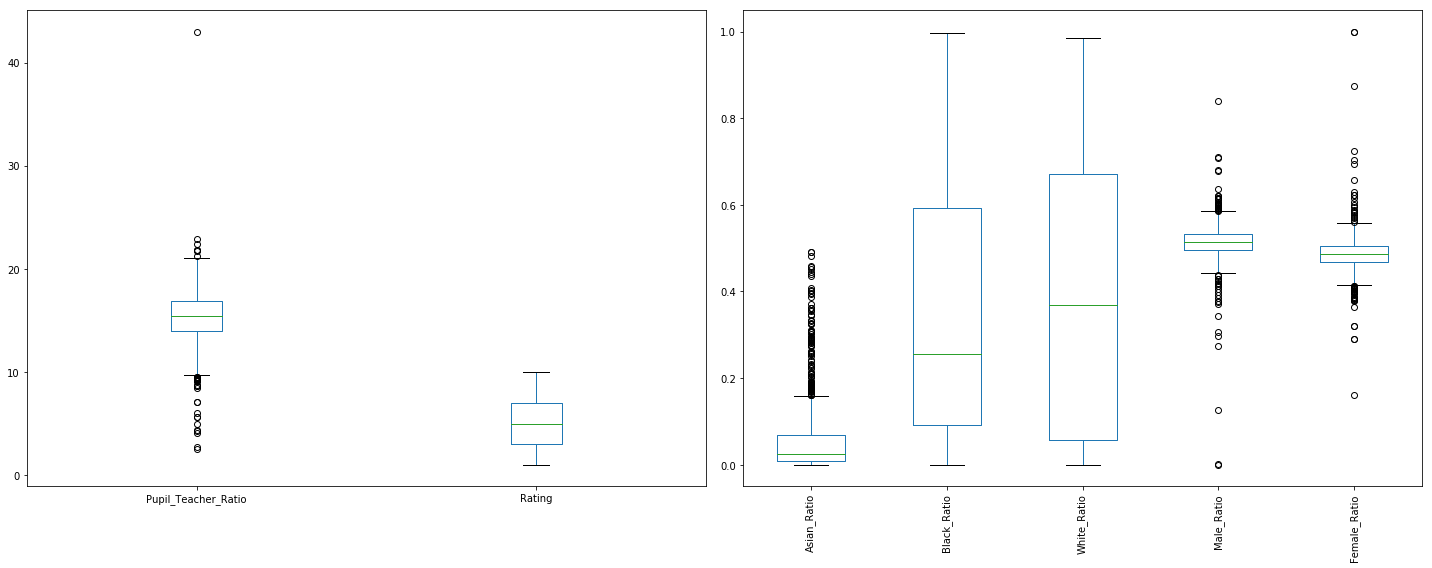

In [28]:
import matplotlib.pyplot as plt
figure, ax=plt.subplots(nrows=1,ncols=2,figsize=(5,1))
df[['Pupil_Teacher_Ratio', 'Rating']].plot(kind='box', figsize=(20,8) ,ax=ax[0])
df[['Asian_Ratio', 'Black_Ratio',  'White_Ratio', 'Male_Ratio', 'Female_Ratio']].plot(kind='box', figsize=(20,8), ax=ax[1])
plt.xticks(rotation = 90)
figure.tight_layout()

**Plot Histograms**
---

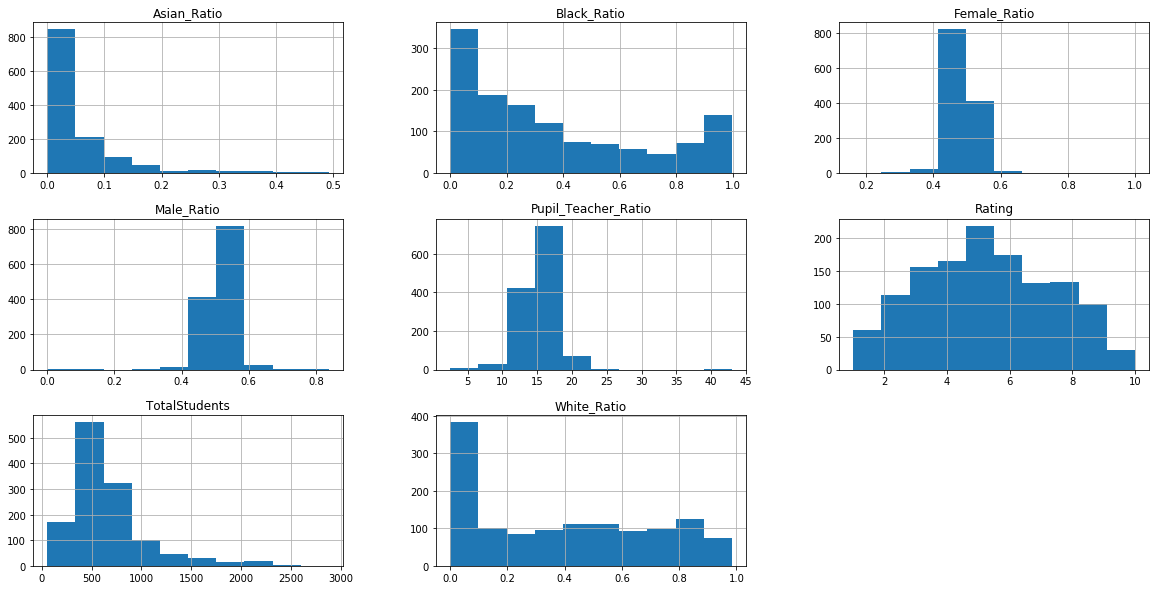

In [29]:
#plot histograms for each of the variables. rating is very normally distributed.
df.hist(figsize=(20,10));

**Make a Stacking Bar Graph**
---

Text(0,0.5,'African American Ratio')

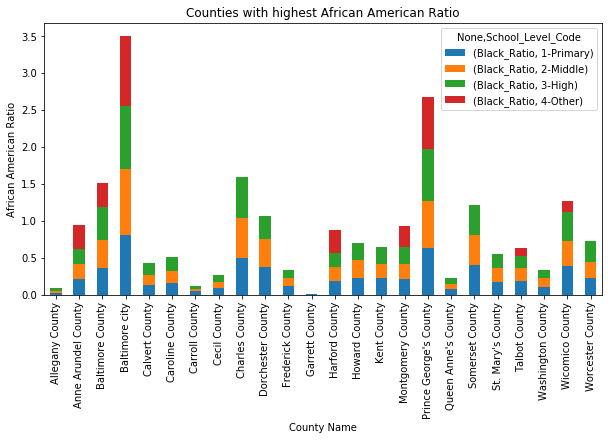

In [30]:
#create a stack diagram to find where are the highest concentration of each race. 
Asian_analysis = df[['County_Name', 'School_Level_Code', 'Black_Ratio']] #change this ratio to Asian_Ratio, White_Ratio, Pupil_Teacher_Ratio to see bar graphs for other demographics.
county_group=Asian_analysis.groupby(['County_Name', 'School_Level_Code']).mean()
county_group.unstack().head()
my_plot = county_group.unstack().plot(kind='bar',stacked=True,title="Counties with highest African American Ratio", figsize=(10,5));
my_plot.set_xlabel("County Name")
my_plot.set_ylabel("African American Ratio")

# 8. Exploratory Data Analysis

---
To determine the MD school district with best school ratings, has all 3 school levels, with lowest pupil to teacher ratio and the highest number of Asian population

In [31]:
#Create a function to find a combination of county and location with at least 1 elementary, middle, and high school
def hasElementaryMiddleHigh(x):
    """
    x is groupby object of sorts
    """
    
    elementaryCount = len(x[x['School_Level_Code'] == '1-Primary'] )
    middleCount = len(x[x['School_Level_Code'] == '2-Middle'] )
    highCount = len(x[x['School_Level_Code'] == '3-High'] )
    
    return(elementaryCount, middleCount, highCount)

In [32]:
#group the data by county and location and then apply the function
countyLocationObject = df.groupby(['County_Name', 'Location']).apply(lambda x: hasElementaryMiddleHigh(x))

In [33]:
#reset indext to using county and location
countyAnalysis_df = pd.DataFrame(countyLocationObject).reset_index()

In [34]:
#show a table of what above results look like
countyAnalysis_df.head()

,County_Name,Location,0
0,Allegany County,CRESAPTOWN,"(1, 0, 1)"
1,Allegany County,CUMBERLAND,"(5, 2, 2)"
2,Allegany County,FLINTSTONE,"(1, 0, 0)"
3,Allegany County,FROSTBURG,"(2, 0, 1)"
4,Allegany County,LAVALE,"(2, 0, 0)"


In [35]:
# separate the tuple into 3 columns of elementaryCounty, middleCounty, and highCount
countyAnalysis_df['elementaryCount'] = countyAnalysis_df[0].apply(lambda x: x[0])
countyAnalysis_df['middleCount'] = countyAnalysis_df[0].apply(lambda x: x[1])
countyAnalysis_df['highCount'] = countyAnalysis_df[0].apply(lambda x: x[2])

In [36]:
#drop the index
countyAnalysis_df = countyAnalysis_df.drop(0, axis = 1)

In [37]:
#Create the filters where there are least 1 elementary, middle, and high school.
filt1 = countyAnalysis_df['elementaryCount'] > 0
filt2 = countyAnalysis_df['middleCount'] > 0
filt3 = countyAnalysis_df['highCount'] > 0

In [38]:
# Get all counties that have all
countyAnalysis_df[filt1 & filt2 & filt3]

,County_Name,Location,elementaryCount,middleCount,highCount
1,Allegany County,CUMBERLAND,5,2,2
8,Anne Arundel County,ANNAPOLIS,11,2,2
13,Anne Arundel County,EDGEWATER,3,1,1
17,Anne Arundel County,GAMBRILLS,1,1,1
18,Anne Arundel County,GLEN BURNIE,15,2,2
25,Anne Arundel County,MILLERSVILLE,1,2,1
27,Anne Arundel County,PASADENA,6,2,2
29,Anne Arundel County,SEVERNA PARK,5,1,1
33,Baltimore County,BALTIMORE,68,20,15
45,Baltimore County,RANDALLSTOWN,3,1,1


In [39]:
# left is similar to a VLookup; mapp the countyLocation analysis back to the original table.

Answer = pd.merge(df, countyAnalysis_df, how = 'left', on = ['County_Name', 'Location'])

In [40]:
#this is what the final table looks like
Answer.head()

,School_Name,County_Name,Location,School_Type,Charter_School,Magnet_School,School_Level_Code,TotalStudents,Pupil_Teacher_Ratio,Black_Ratio,White_Ratio,Asian_Ratio,Male_Ratio,Female_Ratio,Rating,elementaryCount,middleCount,highCount
0,A. Mario Loiederman Middle,Montgomery County,SILVER SPRING,1-Regular school,2-No,1-Yes,2-Middle,919,14.68,0.215452,0.116431,0.060936,0.399347,0.600653,4,33,10,6
1,Abbottston Elementary,Baltimore city,BALTIMORE,1-Regular school,2-No,2-No,1-Primary,217,19.73,0.944700,0.023041,0.004608,0.488479,0.511521,2,120,8,24
2,Aberdeen High,Harford County,ABERDEEN,1-Regular school,2-No,1-Yes,3-High,1453,15.24,0.354439,0.408121,0.043359,0.543703,0.456297,6,3,1,1
3,Aberdeen Middle,Harford County,ABERDEEN,1-Regular school,2-No,2-No,2-Middle,1184,14.74,0.374155,0.399493,0.034628,0.474662,0.525338,5,3,1,1
4,Abingdon Elementary,Harford County,ABINGDON,1-Regular school,2-No,2-No,1-Primary,809,15.68,0.159456,0.678616,0.029666,0.506799,0.493201,8,3,0,0


In [41]:
#create the filter where there are at least 1 elementary, 1 middle, and 1 high school and filter the original dataset to remove the schools that do not meet these criterion.
filt1 = Answer['elementaryCount'] >= 1
filt2 = Answer['middleCount'] >= 1
filt3 = Answer['highCount'] >= 1
Answer=Answer[filt1 & filt2 & filt3]
Answer.shape

(937, 18)

In [42]:
#I'm interested in 3 variables so i drop rest of the other variables and only show the schools that meet the criterion that I set. 
filt1=Answer['Asian_Ratio'] >= 0.2
filt2 = Answer['Rating']>=9
filt3= Answer['Pupil_Teacher_Ratio']<=15.5
Answer=Answer[filt1 & filt2 & filt3]
Answer=Answer.drop(['School_Type', 'Charter_School', 'Magnet_School', 'elementaryCount', 'middleCount', 'highCount'], axis=1)
Answer=Answer.set_index(['County_Name', 'Location', 'School_Level_Code'])
Answer=Answer.sort_index(axis=0, level=0, ascending=True)
Answer.T

County_Name                   Howard County                           \
Location                        CLARKSVILLE                            
School_Level_Code                 1-Primary                1-Primary   
School_Name          Clarksville Elementary  Pointers Run Elementary   
TotalStudents                           465                      744   
Pupil_Teacher_Ratio                   13.68                    13.24   
Black_Ratio                       0.0537634                0.0927419   
White_Ratio                        0.391398                 0.521505   
Asian_Ratio                        0.490323                 0.310484   
Male_Ratio                         0.483871                  0.53629   
Female_Ratio                       0.516129                  0.46371   
Rating                                    9                        9   

County_Name                                               \
Location                                                   
School_Level_Code              2-Middle           3-High   
School_Name          Clarksville Middle  River Hill High   
TotalStudents                       598             1207   
Pupil_Teacher_Ratio               14.24            15.28   
Black_Ratio                    0.048495         0.056338   
White_Ratio                    0.501672          0.54681   
Asian_Ratio                     0.35786         0.285833   
Male_Ratio                       0.5301          0.51367   
Female_Ratio                     0.4699          0.48633   
Rating                                9               10   

County_Name                                                            \
Location                          ELLICOTT CITY                         
School_Level_Code                     1-Primary             1-Primary   
School_Name          Centennial Lane Elementary  Ilchester Elementary   
TotalStudents                               728                   713   
Pupil_Teacher_Ratio                       14.68                 13.71   
Black_Ratio                           0.0425824              0.106592   
White_Ratio                            0.385989              0.582048   
Asian_Ratio                            0.458791              0.228612   
Male_Ratio                             0.521978              0.532959   
Female_Ratio                           0.478022              0.467041   
Rating                                        9                    10   

County_Name                                                             \
Location                                                                 
School_Level_Code                 1-Primary                  1-Primary   
School_Name          Manor Woods Elementary  St. Johns Lane Elementary   
TotalStudents                           704                        729   
Pupil_Teacher_Ratio                   15.24                       14.7   
Black_Ratio                          0.0625                  0.0960219   
White_Ratio                        0.440341                   0.451303   
Asian_Ratio                        0.409091                   0.396433   
Male_Ratio                         0.541193                   0.529492   
Female_Ratio                       0.458807                   0.470508   
Rating                                    9                          9   

County_Name                                                         \
Location                                                             
School_Level_Code                 1-Primary               2-Middle   
School_Name          Worthington Elementary  Ellicott Mills Middle   
TotalStudents                           539                    808   
Pupil_Teacher_Ratio                    15.4                  14.69   
Black_Ratio                       0.0705009               0.149752   
White_Ratio                        0.502783               0.456683   
Asian_Ratio                        0.332096               0.292079   
Male_Ratio        


<a id='standardization'></a>

# 9. Standardizing variables

---

Rescaling variables is very common, and sometimes essential. For example, when we get to regularization of models the rescaling procedure becomes a requirement before fitting the model.

Here we'll rescale the variables using a procedure called "standardization", which forces the distribution of each variable to have a mean of 0 and a standard deviation of 1.

Standardization is not complicated:

    standardized_variable = (variable - mean_of_variable) / std_dev_of_variable
    
Note: Nothing else is changed about the distribution of the variable. It doesn't become normally distributed.


Also print out the mean and standard deviation of the original variable.

In [43]:
#import the function
from sklearn.preprocessing import StandardScaler

In [44]:
# select the columns out of your dataframe to be standardized (usually it will be your input features)
X= df[['Black_Ratio', 'White_Ratio','Asian_Ratio', 'Male_Ratio', 'Female_Ratio', 'Pupil_Teacher_Ratio']]
#check its mean and standard deviation before standardizing
X.mean()
X.std()

Black_Ratio            0.316800
White_Ratio            0.314916
Asian_Ratio            0.078287
Male_Ratio             0.042052
Female_Ratio           0.042052
Pupil_Teacher_Ratio    2.515240
dtype: float64

In [45]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
#check its mean and standard deviation after standardizing
print(X_standardized.mean())
print(X_standardized.std())
#What difference did you see? Describe here

1.272475226132467e-16
1.0


# 10. Correlation matrices

---

A great way to easily get a feel for linear relationships between your variables is with a correlation matrix.



####  Correlation


A much more common metric, and one directly calculable from the covariance, is the correlation.

Again, let $X$ and $Y$ be our two variables, with covariance $cov(X, Y)$ that we calculated above:

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$



#### The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using pandas DataFrame's built in `.corr()` function. Use it below on the boston dataset.

It is very useful to get a feel for what is related and what is not, which can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

In [46]:
df.corr().abs()

,TotalStudents,Pupil_Teacher_Ratio,Black_Ratio,White_Ratio,Asian_Ratio,Male_Ratio,Female_Ratio,Rating
TotalStudents,1.000000,0.250905,0.107308,0.004480,0.194102,0.055945,0.055945,0.180982
Pupil_Teacher_Ratio,0.250905,1.000000,0.033325,0.047791,0.082869,0.169763,0.169763,0.152581
Black_Ratio,0.107308,0.033325,1.000000,0.821310,0.283732,0.016279,0.016279,0.640850
White_Ratio,0.004480,0.047791,0.821310,1.000000,0.006225,0.009350,0.009350,0.607491
Asian_Ratio,0.194102,0.082869,0.283732,0.006225,1.000000,0.020448,0.020448,0.443585
Male_Ratio,0.055945,0.169763,0.016279,0.009350,0.020448,1.000000,1.000000,0.108113
Female_Ratio,0.055945,0.169763,0.016279,0.009350,0.020448,1.000000,1.000000,0.108113
Rating,0.180982,0.152581,0.640850,0.607491,0.443585,0.108113,0.108113,1.000000


**Seaborn also has a great way of showing this to us visually, if colors stick out to you more than decimol values.**

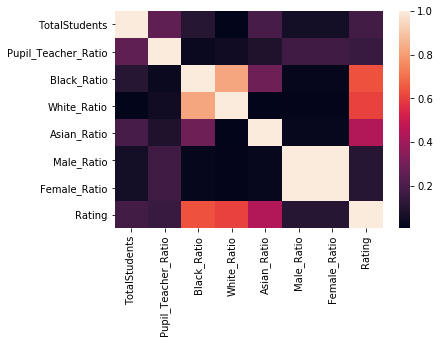

In [47]:
sns.heatmap(df.corr().abs())

In [48]:
df.corr().abs()

,TotalStudents,Pupil_Teacher_Ratio,Black_Ratio,White_Ratio,Asian_Ratio,Male_Ratio,Female_Ratio,Rating
TotalStudents,1.000000,0.250905,0.107308,0.004480,0.194102,0.055945,0.055945,0.180982
Pupil_Teacher_Ratio,0.250905,1.000000,0.033325,0.047791,0.082869,0.169763,0.169763,0.152581
Black_Ratio,0.107308,0.033325,1.000000,0.821310,0.283732,0.016279,0.016279,0.640850
White_Ratio,0.004480,0.047791,0.821310,1.000000,0.006225,0.009350,0.009350,0.607491
Asian_Ratio,0.194102,0.082869,0.283732,0.006225,1.000000,0.020448,0.020448,0.443585
Male_Ratio,0.055945,0.169763,0.016279,0.009350,0.020448,1.000000,1.000000,0.108113
Female_Ratio,0.055945,0.169763,0.016279,0.009350,0.020448,1.000000,1.000000,0.108113
Rating,0.180982,0.152581,0.640850,0.607491,0.443585,0.108113,0.108113,1.000000


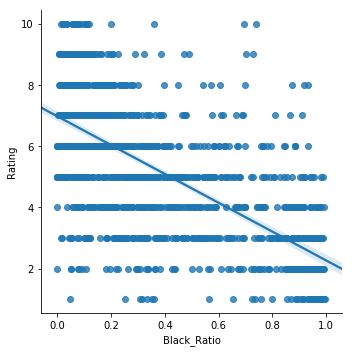

In [49]:
sns.lmplot(x='Black_Ratio', y='Rating', data=df)

# 11. Regression Models

**Dummy Variables and Set X and y for modeling**
---

In [50]:
#rename charter school values into something more meaningful
df['Charter_School']=df['Charter_School'].replace(['2-No'],['NotCharter'])
df['Charter_School']=df['Charter_School'].replace(['1-Yes'],['Charter'])

C:\Users\566093\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\566093\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
#rename magnet school values into something more meaningful
df['Magnet_School']=df['Magnet_School'].replace(['2-No'],['NotMagnet'])
df['Magnet_School']=df['Magnet_School'].replace(['1-Yes'],['Magnet'])

C:\Users\566093\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\566093\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
#review the changes
df.Magnet_School.value_counts()

NotMagnet    1182
Magnet         93
Name: Magnet_School, dtype: int64

In [53]:
#rename school type values into something more meaningful
df=df.replace(['1-Regular school'],['Regular'])
df=df.replace(['4-Alternative/other school'],['Alternative'])
df=df.replace(['2-Special education school'],['Special'])
df=df.replace(['3-Vocational school'],['Vocational'])

In [54]:
df.School_Type.value_counts()

Regular        1252
Vocational       14
Special           6
Alternative       3
Name: School_Type, dtype: int64

In [55]:
df.head(2)

,School_Name,County_Name,Location,School_Type,Charter_School,Magnet_School,School_Level_Code,TotalStudents,Pupil_Teacher_Ratio,Black_Ratio,White_Ratio,Asian_Ratio,Male_Ratio,Female_Ratio,Rating
0,A. Mario Loiederman Middle,Montgomery County,SILVER SPRING,Regular,NotCharter,Magnet,2-Middle,919,14.68,0.215452,0.116431,0.060936,0.399347,0.600653,4
1,Abbottston Elementary,Baltimore city,BALTIMORE,Regular,NotCharter,NotMagnet,1-Primary,217,19.73,0.944700,0.023041,0.004608,0.488479,0.511521,2


In [56]:
#convert all 3 columns into dummy variables
x = ['School_Type','Charter_School','Magnet_School']
for column_name in x:
    df_dummies = pd.get_dummies(df[column_name])
    df = pd.concat([df, df_dummies], axis=1)
    
df.head(2)

,School_Name,County_Name,Location,School_Type,Charter_School,Magnet_School,School_Level_Code,TotalStudents,Pupil_Teacher_Ratio,Black_Ratio,...,Female_Ratio,Rating,Alternative,Regular,Special,Vocational,Charter,NotCharter,Magnet,NotMagnet
0,A. Mario Loiederman Middle,Montgomery County,SILVER SPRING,Regular,NotCharter,Magnet,2-Middle,919,14.68,0.215452,...,0.600653,4,0,1,0,0,0,1,1,0
1,Abbottston Elementary,Baltimore city,BALTIMORE,Regular,NotCharter,NotMagnet,1-Primary,217,19.73,0.944700,...,0.511521,2,0,1,0,0,0,1,0,1


In [57]:
#create my inputs to get ready for modeling
X = df[['Pupil_Teacher_Ratio', 'Black_Ratio','White_Ratio', 'Asian_Ratio','Male_Ratio','Female_Ratio',
        'Alternative', 'Regular','Special', 'Vocational', 
        'Charter', 'NotCharter', 'Magnet', 'NotMagnet']]

In [58]:
#identify rating as my output
y=df[['Rating']]

**Linear Regression**
---

In [59]:
#import functions
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split # Importing this from model_evaluation
from sklearn.metrics import mean_squared_error

In [60]:
#train-test-split using 65% train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=8)

In [61]:
#fit the model and make the prediction. Get a score of the model.
lr = LinearRegression()
model = lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

lr.score(X_test, y_test)

0.5709515168957437

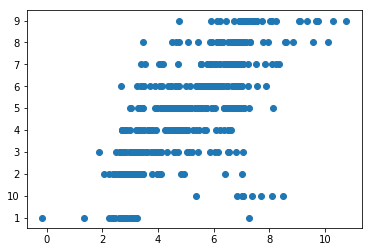

In [62]:
#map the prediction
plt.scatter(predictions, y_test)

**KNN Regression**
---

In [63]:
#import function
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsClassifier

In [64]:
#using 5 nearest neighbors for KNN
knn5 = KNeighborsRegressor(n_neighbors=9)

knn5.fit(X_train, y_train)
knn5.score(X_test, y_test)

# Whether it improved is dependent on the train-test split.

0.4393380364296464

9 0.4393380364296464


Text(0.5,0,'Number of Nearest Neighbors')

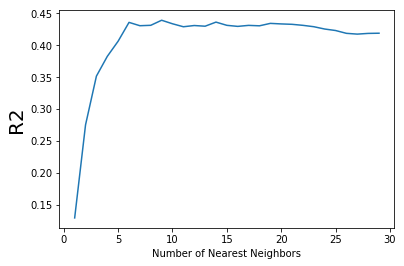

In [65]:
k_scores = {} # Create an empty dictionary
best_score = 0
best_k = 0

for i in range(1,30): # Loop through integers from 1 through however many obvervations there are in the training data
    knn = KNeighborsRegressor(n_neighbors = i) # For every single integer, set neighbors to be that number of integers
    knn.fit(X_train, y_train) # and then fit a model to the training data
    score = knn.score(X_test, y_test) # and save the score for each fit
    k_scores[i] = score # Add this to the empty dictionary with the number of neighbors: score
    
    if score > best_score: # If the current score is better than whatever is currently the best score
        best_score = score # save the current score as best_score
        best_k = i # and the current number of neighbors as best_k

print(best_k, best_score) # and then print out what exactly are the best_k and best_score

# Convert the dict_keys types to lists of numbers
plt.plot(list(k_scores.keys()), list(k_scores.values())); # Plot it, too!
plt.ylabel('R2', fontsize = 20)
plt.xlabel('Number of Nearest Neighbors')

**Random Forest Regression**
---

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [67]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [68]:
rf.fit(X_train, y_train)

C:\Users\566093\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [69]:
predictions = rf.predict(X_test)

In [70]:
rf.score(X_test, y_test)

0.6095189899131463

In [71]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

In [72]:
# List of tuples with variable and importance
feature_list = list(X.columns)
feature_importances = [(X, round(importance, 2)) for X, importance in zip(feature_list, importances)]

In [73]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [74]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: White_Ratio          Importance: 0.32
Variable: Black_Ratio          Importance: 0.29
Variable: Asian_Ratio          Importance: 0.21
Variable: Pupil_Teacher_Ratio  Importance: 0.07
Variable: Male_Ratio           Importance: 0.05
Variable: Female_Ratio         Importance: 0.05
Variable: Regular              Importance: 0.01
Variable: Alternative          Importance: 0.0
Variable: Special              Importance: 0.0
Variable: Vocational           Importance: 0.0
Variable: Charter              Importance: 0.0
Variable: NotCharter           Importance: 0.0
Variable: Magnet               Importance: 0.0
Variable: NotMagnet            Importance: 0.0


# 12. Conclusion

---

1. Through multiple testing, test size of 35% resulted in the highest scores in all 3 models. 

2. Through a for loop, found 9 nearest neighbors produces the best score for KNN Regression model.

3. Random Forest Regressor has the highest score values out of all 3 models because this model considers the importance of each variable in improving the prediction. 

4. Random Forest Regressor identified Caucasian, African American, Asian are the most important variables to consider. This matches our correlation plot. 

5. Although they were identified as the important variables, It is difficult to make conclusion about the school rating is based on race demographics alone because there are several other factors that are not available/considered within this dataset. 
    - For example, African American students tend to be in school district (specific Baltimore City) where there are poor living conditions which could attributes to lack of resources and proper learning environment that can lead to poor school rating. 
    
    - Furthermore, African American students often lacks parental engagement which leads to low attendance and thus poor school rating.
